# K-Means Clustering & UMAP Visualization

In [1]:
import sys
import gzip
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
import umap
import matplotlib.pyplot as plt
import seaborn as sns

src_dir = Path.cwd().parent

# sys.path strictly for importing modules
sys.path.append(str(src_dir))
from utils.data_utils import *

DATA_PATH = src_dir / "data" / "processed"
COHORT_PATH = src_dir / "data" / "processed" / "diabetic_patient_day_table.csv.gz"

In [2]:
all_embeddings = np.load(DATA_PATH / "patient_embeddings.npy")
patient_ids = np.load(DATA_PATH / "patient_ids.npy")

emb_df = pd.DataFrame(all_embeddings, index=patient_ids)
emb_df.index.name = "patient_id"

emb_df.head()

,0
patient_id,
16638841.0,0.365061
13006599.0,0.365025
15057166.0,0.364830
18529984.0,0.364873
19387056.0,0.364791


In [3]:
cohort = load_data(COHORT_PATH)
print(cohort.shape)
cohort.head()

(1372192, 65)


,subject_id,chartdate,50803,50809,50822,50824,50837,50841,50842,50847,...,n_admissions,first_admission_date,last_admission_date,hypertension_flag,ckd_flag,obesity_flag,neuropathy_flag,retinopathy_flag,heart_disease_flag,insulin_flag
0,10000635,2136-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2136-06-19 14:24:00,2143-12-23 14:55:00,True,NaN,True,NaN,NaN,NaN,False
1,10000635,2138-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2136-06-19 14:24:00,2143-12-23 14:55:00,True,NaN,True,NaN,NaN,NaN,False
2,10000635,2141-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2136-06-19 14:24:00,2143-12-23 14:55:00,True,NaN,True,NaN,NaN,NaN,False
3,10000635,2142-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2136-06-19 14:24:00,2143-12-23 14:55:00,True,NaN,True,NaN,NaN,NaN,False
4,10000635,2143-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2136-06-19 14:24:00,2143-12-23 14:55:00,True,NaN,True,NaN,NaN,NaN,False


## K-Means Clustering (Mini-Batch)

In [6]:
n_clusters = 5
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000, random_state=42)

# Fit and predict
emb_df['cluster'] = mbk.fit_predict(all_embeddings)

print("Cluster counts:")
print(emb_df['cluster'].value_counts())

Cluster counts:
cluster
0    31738
3    10145
2     3124
4      941
Name: count, dtype: int64


In [9]:
all_embeddings.shape

(45948, 1)

In [10]:
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1, 
    n_components=2, 
    random_state=42,
    verbose=True
)

emb = reducer.fit_transform(all_embeddings[:1000])

/opt/anaconda3/envs/cph100_final/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Dec 11 22:56:50 2025 Construct fuzzy simplicial set
Thu Dec 11 22:56:50 2025 Finding Nearest Neighbors
Thu Dec 11 22:56:50 2025 Building RP forest with 12 trees
Thu Dec 11 22:56:50 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Thu Dec 11 22:56:51 2025 Finished Nearest Neighbor Search
Thu Dec 11 22:56:51 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Dec 11 22:57:10 2025 Finished embedding


In [11]:
# Perform UMAP dimensionality reduction
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1, 
    n_components=2, 
    random_state=42,
    verbose=True
)
umap_embeddings = reducer.fit_transform(all_embeddings)

/opt/anaconda3/envs/cph100_final/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Dec 11 22:58:04 2025 Construct fuzzy simplicial set
Thu Dec 11 22:58:04 2025 Finding Nearest Neighbors
Thu Dec 11 22:58:04 2025 Building RP forest with 16 trees
Thu Dec 11 22:58:04 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Thu Dec 11 22:58:05 2025 Finished Nearest Neighbor Search
Thu Dec 11 22:58:05 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Dec 11 22:58:44 2025 Finished embedding


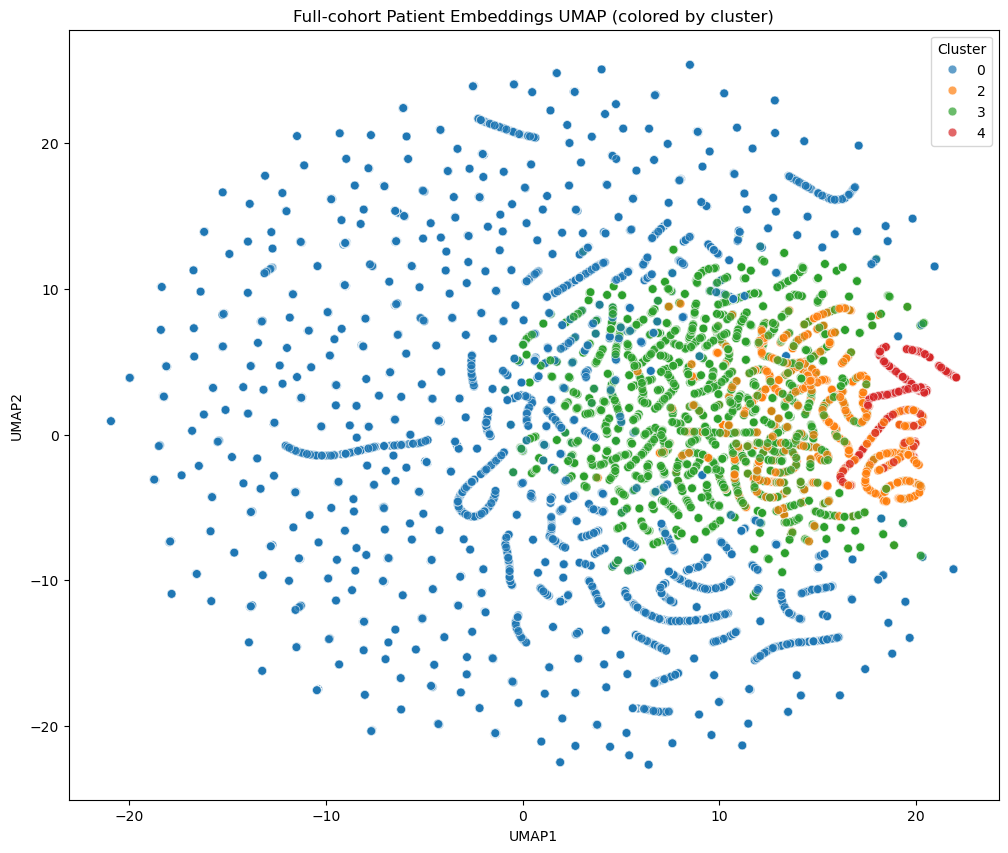

In [12]:
umap_df = pd.DataFrame(
    umap_embeddings, 
    columns=['UMAP1', 'UMAP2'], 
    index=patient_ids
)
umap_df['cluster'] = emb_df['cluster']

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=umap_df,
    x='UMAP1',
    y='UMAP2',
    hue='cluster',
    palette='tab10',
    s=40,
    alpha=0.7
)
plt.title("Full-cohort Patient Embeddings UMAP (colored by cluster)")
plt.legend(title='Cluster')
plt.show()

In [13]:
print(umap_df.columns)
umap_df.head()

Index(['UMAP1', 'UMAP2', 'cluster'], dtype='object')


,UMAP1,UMAP2,cluster
16638841.0,5.615193,16.170483,0
13006599.0,13.473833,-12.136061,0
15057166.0,13.987015,-0.035728,2
18529984.0,10.314149,-3.734678,3
19387056.0,15.095446,5.636257,3


In [26]:
cohort['subject_id'] = cohort['subject_id'].astype(umap_df.index.dtype)
clustered_df = cohort.merge(
    umap_df[['cluster']],
    left_on='subject_id',
    right_index=True,
)

lab_cols = cohort.columns[2:53]
for col in lab_cols:
    cohort[col] = pd.to_numeric(cohort[col], errors="coerce").astype("float32")

static_cols = [col for col in cohort.columns if col not in lab_cols]
cohort["first_admission_date"] = pd.to_datetime(cohort["first_admission_date"], errors="coerce")
cohort["last_admission_date"] = pd.to_datetime(cohort["last_admission_date"], errors="coerce")

cohort["gender"] = cohort["gender"].map({"M": 0, "F": 1}).astype("float32")
cohort["age"] = pd.to_numeric(cohort["age"], errors="coerce").astype("float32")
cohort["n_admissions"] = pd.to_numeric(cohort["n_admissions"], errors="coerce").astype("float32")

flag_cols = [
    'hypertension_flag', 'ckd_flag', 'obesity_flag', 'neuropathy_flag',
    'retinopathy_flag', 'heart_disease_flag', 'insulin_flag'
]

for col in flag_cols:
    cohort[col] = pd.to_numeric(cohort[col], errors="coerce").fillna(0).astype("float32")

if "chartdate" in clustered_df.columns:
    clustered_df = clustered_df.drop(columns=["chartdate"])

clustered_df = clustered_df.groupby("subject_id").agg({

    # all labs averaged
    **{col: "mean" for col in lab_cols},

    # simple safe keep rules
    "gender": "first",
    "age": "mean",
    "n_admissions": "max",
    "first_admission_date": "min",
    "last_admission_date": "max",
    "hypertension_flag": "max",
    "ckd_flag": "max",
    "obesity_flag": "max",
    "neuropathy_flag": "max",
    "retinopathy_flag": "max",
    "heart_disease_flag": "max",
    "insulin_flag": "max",

    # cluster: pick most common
    "cluster": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
})

print(clustered_df.columns)

clustered_df.head()

Index(['50803', '50809', '50822', '50824', '50837', '50841', '50842', '50847',
       '50848', '50852', '50854', '50882', '50912', '50931', '50971', '50983',
       '51021', '51022', '51027', '51032', '51034', '51041', '51042', '51048',
       '51052', '51053', '51057', '51058', '51061', '51064', '51065', '51067',
       '51070', '51073', '51076', '51080', '51081', '51082', '51084', '51097',
       '51099', '51100', '51106', '51478', '51790', '51981', '52024', '52546',
       '52569', '52610', '52623', 'gender', 'age', 'n_admissions',
       'first_admission_date', 'last_admission_date', 'hypertension_flag',
       'ckd_flag', 'obesity_flag', 'neuropathy_flag', 'retinopathy_flag',
       'heart_disease_flag', 'insulin_flag', 'cluster'],
      dtype='object')


,50803,50809,50822,50824,50837,50841,50842,50847,50848,50852,...,first_admission_date,last_admission_date,hypertension_flag,ckd_flag,obesity_flag,neuropathy_flag,retinopathy_flag,heart_disease_flag,insulin_flag,cluster
subject_id,,,,,,,,,,,,,,,,,,,,,
10000635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2136-06-19 14:24:00,2143-12-23 14:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
10000980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.109091,...,2188-01-03 17:41:00,2193-08-15 01:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
10001176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2186-11-29 03:56:00,2186-11-29 03:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10001843.0,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2131-11-09 16:05:00,2134-12-05 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
10001877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,...,2149-05-21 15:53:00,2150-11-21 23:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
clustered_df.dtypes

50803                 float32
50809                 float32
50822                 float32
50824                 float32
50837                 float32
                       ...   
neuropathy_flag       float32
retinopathy_flag      float32
heart_disease_flag    float32
insulin_flag          float32
cluster                 int32
Length: 64, dtype: object

In [35]:
plot_df = umap_df[["UMAP1", "UMAP2"]].merge(clustered_df, left_index=True, right_index=True)
plot_df.head()

,UMAP1,UMAP2,50803,50809,50822,50824,50837,50841,50842,50847,...,first_admission_date,last_admission_date,hypertension_flag,ckd_flag,obesity_flag,neuropathy_flag,retinopathy_flag,heart_disease_flag,insulin_flag,cluster
16638841.0,5.615193,16.170483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2137-11-11 23:16:00,2137-11-11 23:16:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13006599.0,13.473833,-12.136061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2173-01-14 15:03:00,2174-03-21 16:39:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15057166.0,13.987015,-0.035728,NaN,109.634918,4.408572,132.333328,NaN,NaN,NaN,NaN,...,2138-10-30 13:22:00,2147-09-17 19:26:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
18529984.0,10.314149,-3.734678,21.0,213.750000,4.560000,143.125000,NaN,NaN,NaN,NaN,...,2158-05-15 21:04:00,2166-09-07 19:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
19387056.0,15.095446,5.636257,NaN,167.000000,4.950000,NaN,NaN,NaN,NaN,NaN,...,2175-06-06 15:50:00,2185-03-09 16:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


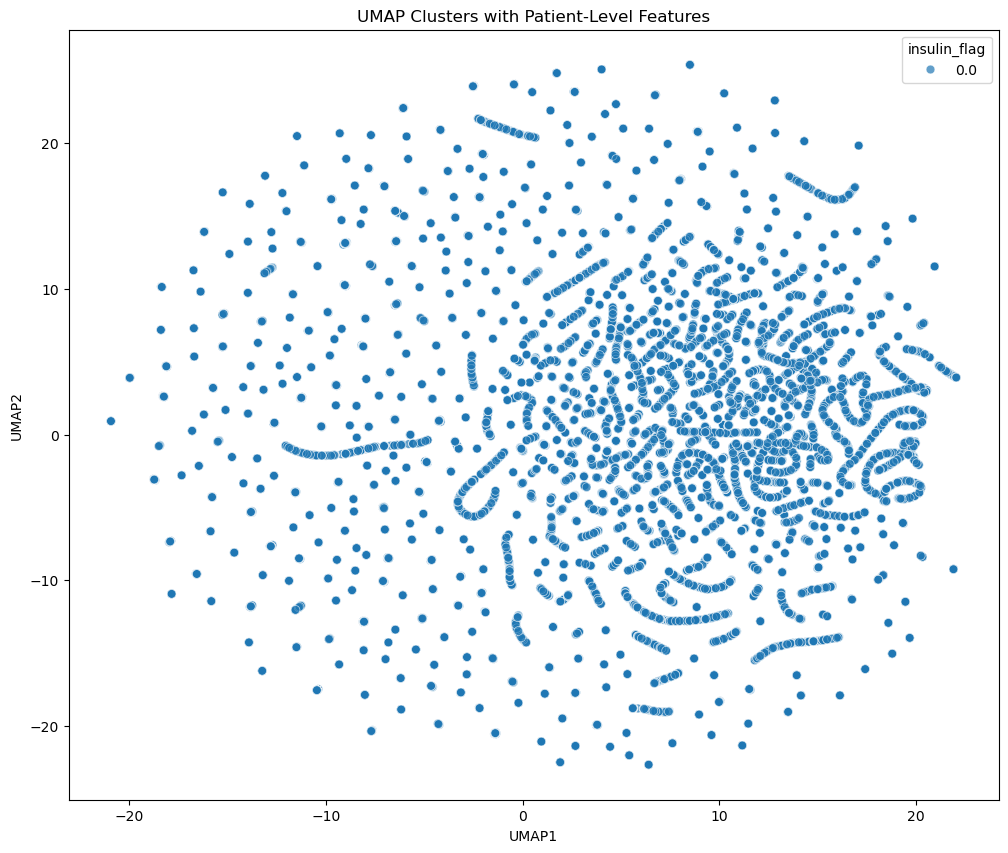

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(
    data=plot_df,
    x='UMAP1', y='UMAP2',
    hue='insulin_flag',
    palette='tab10',
    s=40, alpha=0.7
)
plt.title("UMAP Clusters with Patient-Level Features")
plt.show()